## Trabalho Final - Ciência de Dados - Enap / 2020

### Apresentação do Dataset

In [ ]:
#Dados sobre as despesas cobertas pela Cota para Exercício da Atividade Parlamentar de cada deputado.
#A cota parlamentar é o valor que os membros do Poder Legislativo têm direito a receber para cobrir 
#despesas em função da sua atividade. O pagamento da cota parlamentar é realizado através de 
#reembolso, ou seja, o político gasta dentro das regras e depois entrega a nota fiscal no órgão 
#interno definido pela Casa, sendo essa a comprovação de que o gasto está de acordo com as normas


#### Link para Download do Dataset

In [ ]:
# Dados disponibilizados em https://dadosabertos.camara.leg.br/swagger/api.html#staticfile, acessados
# em 28/11/2020
# https://github.com/mauroslima/dados/raw/main/2020.xlsx
# https://github.com/mauroslima/dados/raw/main/proposicoes_2020.csv

### Motivação Pessoal

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Investigação

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [205]:
path_gastos = 'https://github.com/mauroslima/dados/raw/main/2020.xlsx'
path_proposicoes = 'https://raw.githubusercontent.com/mauroslima/dados/main/proposicoes_2020.csv'
df_gastos = pd.read_excel(path_gastos, na_values=' ', dtype={'cpf':np.str, 'ideCadastro':np.str})
df_gastos.drop(['ideCadastro', 'numSubCota', 'cpf', 'nuLegislatura', 'codLegislatura', 
                'numEspecificacaoSubCota', 'vlrGlosa', 'numParcela', 'txtPassageiro', 
                'txtTrecho', 'numLote', 'ideDocumento', 'urlDocumento', 'numRessarcimento', 
                'vlrRestituicao', 'nuCarteiraParlamentar', 'txtDescricaoEspecificacao', 
                'txtNumero', 'indTipoDocumento' ], inplace=True, axis=1)
df_gastos.rename(columns={'txNomeParlamentar':'parlamentar', 'sgUF': 'UF', 'sgPartido':
                          'partido', 'txtDescricao': 'descricao', 'txtFornecedor':'fornecedor',
                          'txtCNPJCPF':'CPF/CNPJ', 'datEmissao':'data_emissao', 
                          'vlrDocumento':'valor', 'vlrLiquido':'valor_liquido', 'numMes': 'mes', 
                          'numAno':'ano','nuDeputadoId':'deputado_id' }, inplace=True)
df_gastos = df_gastos.dropna(how='any',axis=0)
df_gastos
df_proposicoes = pd.read_csv(path_proposicoes, delimiter=';')
df_proposicoes = df_proposicoes.dropna(how='any',axis=0)
df_proposicoes['idDeputadoAutor'] = df_proposicoes['idDeputadoAutor'].astype(int)
df_proposicoes.rename(columns={'idDeputadoAutor':'id_deputado', 'nomeAutor': 'nome_deputado', 'siglaPartidoAutor':'partido', 'siglaUFAutor':'UF','idProposicao':'id_proposicao' }, inplace=True)
df_proposicoes.drop(['uriProposicao', 'uriAutor', 'codTipoAutor', 'uriPartidoAutor', 'ordemAssinatura', 'proponente', 'tipoAutor'], inplace=True, axis=1)
df_proposicoes

,id_proposicao,id_deputado,nome_deputado,partido,UF
0,2265669,178970,João Daniel,PT,SE
1,2265668,178970,João Daniel,PT,SE
2,2265667,204488,Célio Studart,PV,CE
3,2265666,66828,Fausto Pinato,PP,SP
4,2265665,133439,André Figueiredo,PDT,CE
...,...,...,...,...,...
50365,2236240,204534,Tabata Amaral,PDT,SP
50366,2236238,73531,Ivan Valente,PSOL,SP
50371,2236222,204429,João H. Campos,PSB,PE
50374,2116186,178956,Mariana Carvalho,PSDB,RO


In [267]:
gastos_deputados = df_gastos.groupby(['parlamentar', 'partido']).agg({'valor_liquido': 'sum'}
                                                 ).sort_values(by='valor_liquido', 
                                                               ascending=False).head(5)
gastos_deputados.reset_index(inplace=True)
gastos_deputados

,parlamentar,partido,valor_liquido
0,João Maia,PL,471198.46
1,Jesus Sérgio,PDT,444583.48
2,Manuel Marcos,REPUBLICANOS,443124.03
3,Wellington Roberto,PL,441890.36
4,Marcelo Ramos,PL,438660.79


In [344]:
gastos_partidos = df_gastos.groupby(['partido']).agg({'valor_liquido': 'sum'}).sort_values(by='valor_liquido', ascending=False).head(10)
gastos_partidos.reset_index(inplace=True)
gastos_partidos

,partido,valor_liquido
0,PT,13780670.74
1,PSL,11284155.40
2,PL,10076545.47
3,PP,9263400.79
4,MDB,8506840.99
5,PSD,8257598.71
6,REPUBLICANOS,8198290.56
7,PSDB,7792214.49
8,PDT,7500483.36
9,DEM,6829305.53


In [331]:
proposicoes_deputado = df_proposicoes.groupby(['nome_deputado', 'partido']).size().sort_values(ascending=False).head(10)
proposicoes_deputado = proposicoes_deputado.to_frame()
proposicoes_deputado.reset_index(inplace=True)
proposicoes_deputado



,nome_deputado,partido,0
0,Enio Verri,PT,1326
1,Alessandro Molon,PSB,981
2,Erika Kokay,PT,827
3,Wolney Queiroz,PDT,819
4,Fernanda Melchionna,PSOL,690
5,Perpétua Almeida,PCdoB,567
6,Patrus Ananias,PT,562
7,Jorge Solla,PT,546
8,Ivan Valente,PSOL,497
9,José Guimarães,PT,494


In [340]:
proposicoes_partido = df_proposicoes.groupby('partido').size().sort_values(ascending=False).head(10)
proposicoes_partido = proposicoes_partido.to_frame()
proposicoes_partido.reset_index(inplace=True)
proposicoes_partido.rename(columns={0:'qtd_proposicoes'},inplace=True)
proposicoes_partido.columns


Index(['partido', 'qtd_proposicoes'], dtype='object')

In [317]:
gastos_partidos = df_gastos.groupby(['partido']).agg({'valor_liquido': 'sum'}).sort_values(by='valor_liquido', ascending=False).head(10)
gastos_partidos

,valor_liquido
partido,
PT,13780670.74
PSL,11284155.40
PL,10076545.47
PP,9263400.79
MDB,8506840.99
PSD,8257598.71
REPUBLICANOS,8198290.56
PSDB,7792214.49
PDT,7500483.36


### Conclusões e Achados

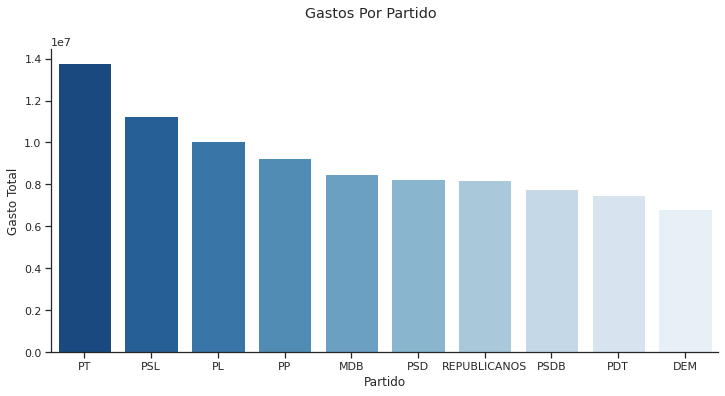

In [350]:
g_partido = sns.catplot(x='partido', y='valor_liquido', data=gastos_partidos, kind='bar',
                        aspect=2, palette=sns.color_palette('Blues_r', 10))
g_partido.fig.suptitle("Gastos Por Partido", y=1.05)
g_partido.set(xlabel="Partido",ylabel="Gasto Total")
plt.show()

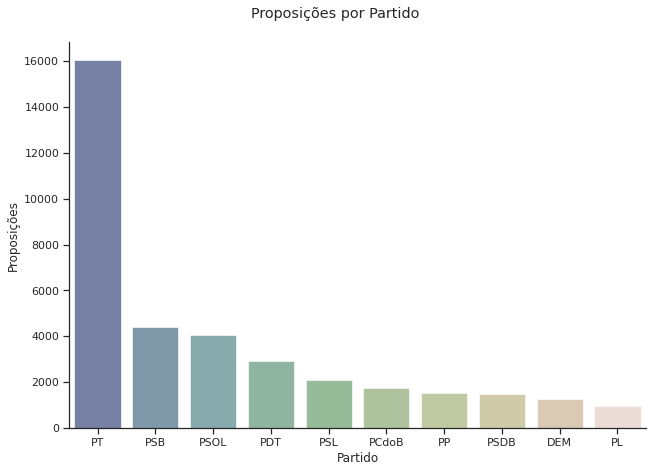

In [351]:
g_deputados = sns.catplot(x='partido', y='qtd_proposicoes',data=proposicoes_partido, kind="bar",
                        aspect=1.5,  palette="gist_earth", alpha=.6, height=6)
g_deputados.fig.suptitle("Proposições por Partido", y=1.05)
g_deputados.set(xlabel="Partido",ylabel="Proposições")
plt.show()